# Cats and Dogs, Better Classification
Applied Neural Networks <br/>
Dr. Leslie Kerby
Student: Ziming Wang

Use the Cats and Dogs dataset in Kaggle from Homework 3. Download the dataset and perform necessary data wrangling or preprocessing, just like you did in HW 3 (ie in Parts 1-3).

# Preprocessing Data

In [ ]:
! pip install scikit-learn==0.21.2

     |████████████████████████████████| 6.7MB 12.4MB/s 
ERROR: umap-learn 0.5.1 has requirement scikit-learn>=0.22, but you'll have scikit-learn 0.21.2 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wangzimi","key":"b8962e9a4c57ef963c0a7ad40d74a796"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              217KB  2021-03-24 09:00:10            909  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            714  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            664  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            276  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [ ]:
! kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 31.4MB/s]
 97% 526M/543M [00:09<00:00, 92.2MB/s]
100% 543M/543M [00:09<00:00, 61.0MB/s]
 95% 257M/271M [00:03<00:00, 64.4MB/s]
100% 271M/271M [00:03<00:00, 75.4MB/s]


In [ ]:
! mkdir train

In [ ]:
!unzip \*.zip  && rm *.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      
  inflating: train/dog.5521.jpg      
  inflating: train/dog.

In [ ]:
! ls

kaggle.json  sample_data  sampleSubmission.csv	test1  train


In [ ]:
# Before the Parts, import dataset
# Change runtime to GPU
import tensorflow as tf
from tensorflow import keras

import numpy as np

np.random.seed(42)
tf.random.set_seed(42)

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# You may find the following code hints useful

import os

# the name of file
filenames = os.listdir("train/")
# category of list
categories = []
# By looping through the pictures in filenames, cat is represented as 1 and dog is represented as 0 according to the name.
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append(1)
    else:
        categories.append(0)
# Finally got a dataFrame, which has the file name and type.
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df.head(5)

,filename,category
0,dog.8583.jpg,0
1,cat.2392.jpg,1
2,dog.3491.jpg,0
3,cat.5043.jpg,1
4,cat.4225.jpg,1


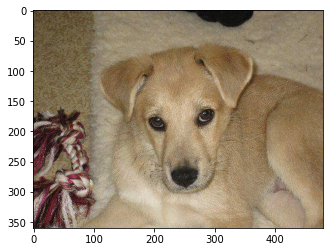

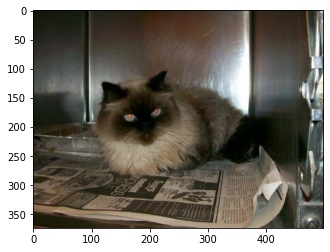

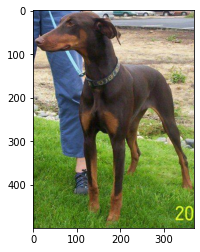

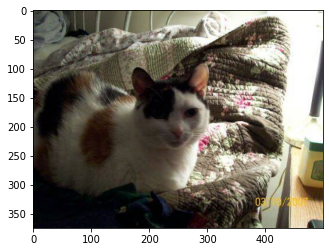

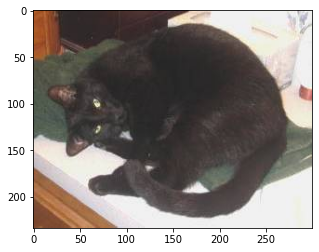

In [ ]:
# To print the 5 images from data frame
import cv2
import random
for i in range(5):
  sample = filenames[i]
  img = cv2.imread('train/'+sample, cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()

In [ ]:
# Created a function that accepts the path of the file
def resize_img(file_path):
  # img is equal to the picture in cv2
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  # Convert the picture to 80X80 size
  return cv2.resize(img, (80,80))  # This tuple represents the final image size desired

'''y = np.ndarray((25000,))
for i,category_result in enumerate(df['category']):
    y[i] = category_result
y.astype(int)'''

y = df['category'].to_numpy(dtype=np.byte)

# A four-dimensional array
X = np.ndarray((25000,80,80,3)) # 25000 images, 80x80 pixels, 3 channels (RGB)
# Convert each picture into 80 80 pictures and save them in X
for i,image_file in enumerate(df['filename']):
    X[i,:] = resize_img('train/'+image_file)


In [ ]:
# X = X/255
# Split the data to get the test data
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                     y,
                                     test_size=5000)

# Split the data to get the validation data
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full,
                                          y_train_full,
                                          test_size=5000)

**Part 1** <br/>
Create a CNN dog/cat classifier with the following architecture: <br/>
Conv2D: 64 filters, 7x7 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Conv2D: 128 filters, 3x3 kernel <br/>
Conv2D: 128 filters, 3x3 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Conv2D: 256 filters, 3x3 kernel <br/>
Conv2D: 256 filters, 3x3 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Flatten <br/>
Dense: 128 neurons <br/>
Dropout(15%) <br/>
Dense: 64 neurons <br/>
Dropout(15%) <br/>
Output <br/>
strides=1, padding="same", and activation="relu" for all relevant layers <br/>
Utilize the Nadam optimizer and Early Stopping

What is your accuracy for the validation set and for the test set? Plot several misclassified images.

Save your accuracy and val_accuracy each epoch. You will plot them in Part 4.

# Part 1 - Standard Model from the Requirements

In [ ]:
# Standard imports
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Build CNN (without normalization)
model_part_1 = keras.models.Sequential([
        keras.layers.Conv2D(filters=64, kernel_size=[7,7], strides=[1,1],
                            padding="same", activation="relu", input_shape=[80,80,3]),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=1, padding="same",
                            activation="relu"),
        keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=1, padding="same",
                            activation="relu"),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(256, (3,3)),
        keras.layers.Conv2D(256, (3,3)),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten(input_shape = [80,80,3]),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model_part_1.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

In [ ]:
history_part_1 = model_part_1.fit(X_train_tr, y_train_tr, epochs=100, batch_size=32,
                    validation_data=(X_train_v, y_train_v),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
469/469 [==============================] - 11s 21ms/step - loss: 8.2756 - accuracy: 0.5665 - val_loss: 0.5699 - val_accuracy: 0.7122
Epoch 2/100
469/469 [==============================] - 9s 20ms/step - loss: 0.6472 - accuracy: 0.6575 - val_loss: 0.6253 - val_accuracy: 0.6666
Epoch 3/100
469/469 [==============================] - 9s 20ms/step - loss: 1422.8729 - accuracy: 0.5783 - val_loss: 0.6949 - val_accuracy: 0.5062
Epoch 4/100
469/469 [==============================] - 9s 20ms/step - loss: 0.8008 - accuracy: 0.5004 - val_loss: 0.7014 - val_accuracy: 0.4938
Epoch 5/100
469/469 [==============================] - 9s 20ms/step - loss: 0.7108 - accuracy: 0.4971 - val_loss: 0.6950 - val_accuracy: 0.4938
Epoch 6/100
469/469 [==============================] - 9s 20ms/step - loss: 0.7085 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.4938


In [ ]:
model_part_1.evaluate(X_test, y_test)

157/157 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.4958


[0.693198025226593, 0.4957999885082245]

My accuracy for the validation set and for the test set is 0.4956.

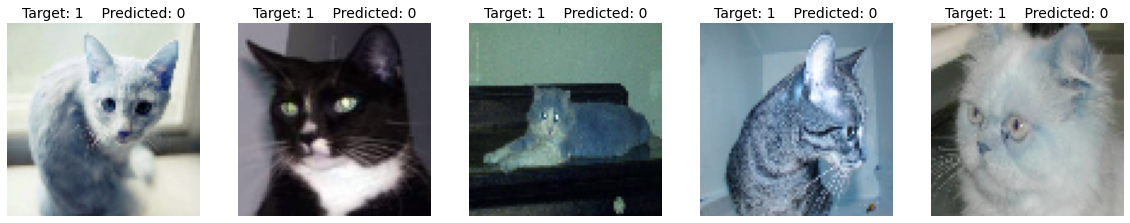

In [ ]:
# Display misclassified images

classes = ['0', '1']
X_test_t = X_test/255

predictions = np.argmax(model_part_1.predict(X_test_t/255), axis=-1)

misclassifiedIndexes = []
index = 0

for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test_t[misclassifiedIndexes[index]], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

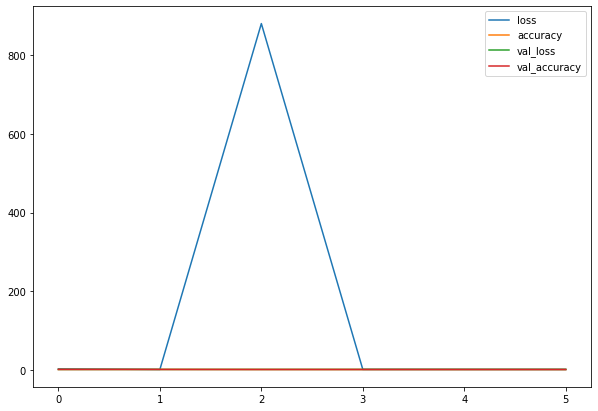

In [ ]:
pd.DataFrame(history_part_1.history).plot(figsize=(10,7))

**Part 2** </br>
Add data augmentation, through the ImageDataGenerator in Keras. Try different CNN architectures and/or parameters to improve your model. You may also try splitting up the dataset differently (ie more images in training and less in validation and testing sets).

What is the accuracy of your best model (on both validation and testing sets)? Plot several misclassified images. Save your accuracy and val_accuracy per epoch (from your best model). You will plot them in Part 4.

# 1. Add data augmentation to Part 1 Standard Model

In [ ]:
# Add data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

In [ ]:
# Build CNN (without normalization)
model_part2_1 = keras.models.Sequential([
        keras.layers.Conv2D(filters=64, kernel_size=[7,7], strides=[1,1],
                            padding="same", activation="relu", input_shape=[80,80,3]),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=1, padding="same",
                            activation="relu"),
        keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=1, padding="same",
                            activation="relu"),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(256, (3,3), padding="same"),
        keras.layers.Conv2D(256, (3,3), padding="same"),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten(input_shape = [80,80,3]),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model_part2_1.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

In [ ]:
history_part2_1 = model_part2_1.fit(datagen.flow(X_train_tr, y_train_tr, batch_size=32),
                    epochs=100,
                    validation_data=(X_train_v, y_train_v),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
469/469 [==============================] - 24s 48ms/step - loss: 7.7297 - accuracy: 0.5088 - val_loss: 0.6938 - val_accuracy: 0.4874
Epoch 2/100
469/469 [==============================] - 22s 48ms/step - loss: 0.7090 - accuracy: 0.4906 - val_loss: 0.7008 - val_accuracy: 0.4936
Epoch 3/100
469/469 [==============================] - 22s 47ms/step - loss: 0.6990 - accuracy: 0.5002 - val_loss: 0.6942 - val_accuracy: 0.4770
Epoch 4/100
469/469 [==============================] - 22s 47ms/step - loss: 0.7028 - accuracy: 0.4929 - val_loss: 0.6928 - val_accuracy: 0.5234
Epoch 5/100
469/469 [==============================] - 22s 46ms/step - loss: 0.6959 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.5088
Epoch 6/100
469/469 [==============================] - 22s 46ms/step - loss: 0.6966 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.4940
Epoch 7/100
469/469 [==============================] - 22s 47ms/step - loss: 0.6962 - accuracy: 0.5002 - val_loss: 0.6936 - val_ac

In [ ]:
model_part2_1.evaluate(X_test, y_test)

157/157 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.4956


[0.6932365298271179, 0.49559998512268066]

My accuracy for the validation set and for the test set is 0.4956.

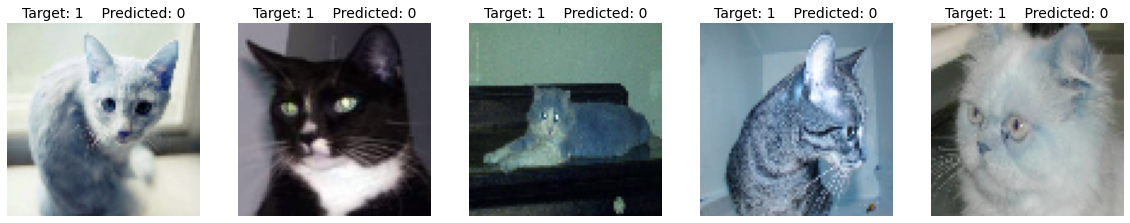

In [ ]:
# Display misclassified images

classes = ['0', '1']
X_test_t = X_test/255

predictions = np.argmax(model_part2_1.predict(X_test_t/255), axis=-1)

misclassifiedIndexes = []
index = 0

for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test_t[misclassifiedIndexes[index]], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

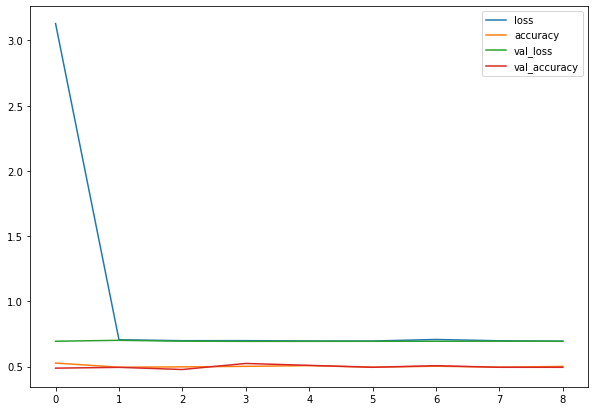

In [ ]:
pd.DataFrame(history_part2_1.history).plot(figsize=(10,7))

# 2. Add data augmentation and change architecture

In [ ]:
# Change architecture and add data augmentation
model_part2_2 = keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape = [80,80,3]),
        keras.layers.Conv2D(filters=64, kernel_size=[7,7], strides=[1,1],
                            padding="same", activation="relu", input_shape=[80,80,3]),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same",
                            activation="relu"),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(256, 3, activation="relu"),
        keras.layers.MaxPool2D(2),

        keras.layers.Flatten(input_shape=[80,80,3]),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model_part2_2.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

In [ ]:
history_part2_2 = model_part2_2.fit(datagen.flow(X_train_tr, y_train_tr, batch_size=32),
                    epochs=100,
                    validation_data=(X_train_v, y_train_v),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
469/469 [==============================] - 23s 46ms/step - loss: 0.7573 - accuracy: 0.5376 - val_loss: 0.6564 - val_accuracy: 0.6076
Epoch 2/100
469/469 [==============================] - 21s 45ms/step - loss: 0.6564 - accuracy: 0.6121 - val_loss: 0.6045 - val_accuracy: 0.6656
Epoch 3/100
469/469 [==============================] - 21s 46ms/step - loss: 0.5967 - accuracy: 0.6758 - val_loss: 0.5541 - val_accuracy: 0.7132
Epoch 4/100
469/469 [==============================] - 22s 46ms/step - loss: 0.5505 - accuracy: 0.7200 - val_loss: 0.4973 - val_accuracy: 0.7544
Epoch 5/100
469/469 [==============================] - 21s 45ms/step - loss: 0.5058 - accuracy: 0.7464 - val_loss: 0.4631 - val_accuracy: 0.7754
Epoch 6/100
469/469 [==============================] - 21s 45ms/step - loss: 0.4717 - accuracy: 0.7790 - val_loss: 0.4712 - val_accuracy: 0.7748
Epoch 7/100
469/469 [==============================] - 21s 45ms/step - loss: 0.4318 - accuracy: 0.8008 - val_loss: 0.4057 - val_ac

In [ ]:
model_part2_2.evaluate(X_test, y_test)

157/157 [==============================] - 1s 5ms/step - loss: 0.3082 - accuracy: 0.8788


[0.308170884847641, 0.8787999749183655]

My accuracy for the validation set and for the test set is 0.8788.

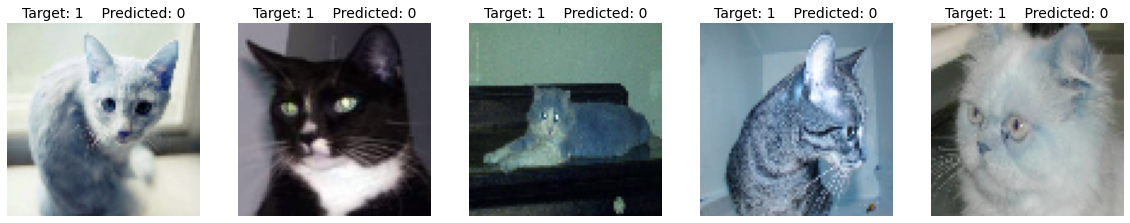

In [ ]:
# Display misclassified images

classes = ['0', '1']
X_test_t = X_test/255

predictions = np.argmax(model_part2_2.predict(X_test_t/255), axis=-1)

misclassifiedIndexes = []
index = 0

for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test_t[misclassifiedIndexes[index]], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

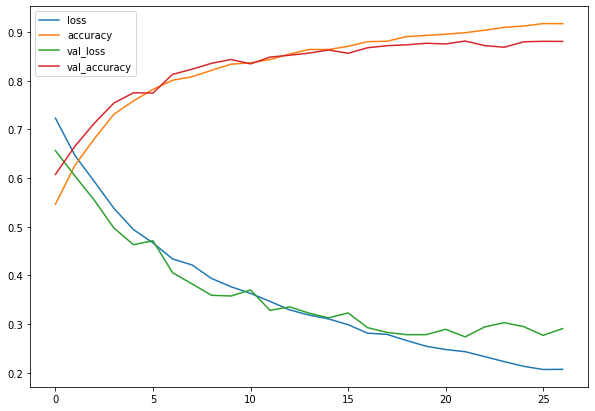

In [ ]:
pd.DataFrame(history_part2_2.history).plot(figsize=(10,7))

# 3. Add data augmentation and the best model in part 2

In [ ]:
model_part2_3 = keras.models.Sequential([
        keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=[80,80,3]),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Conv2D(128, 3, activation="relu"),
        keras.layers.MaxPool2D((2,2)),

        keras.layers.Flatten(input_shape=[80,80,3]),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model_part2_3.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

In [ ]:
history_part2_3 = model_part2_3.fit(datagen.flow(X_train_tr, y_train_tr, batch_size=32),
                    epochs=100,
                    validation_data=(X_train_v, y_train_v),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
469/469 [==============================] - 21s 43ms/step - loss: 4.1629 - accuracy: 0.5592 - val_loss: 0.6490 - val_accuracy: 0.6366
Epoch 2/100
469/469 [==============================] - 20s 43ms/step - loss: 0.6531 - accuracy: 0.6244 - val_loss: 0.6031 - val_accuracy: 0.6754
Epoch 3/100
469/469 [==============================] - 20s 42ms/step - loss: 0.5992 - accuracy: 0.6822 - val_loss: 0.5549 - val_accuracy: 0.7216
Epoch 4/100
469/469 [==============================] - 20s 43ms/step - loss: 0.5553 - accuracy: 0.7160 - val_loss: 0.6080 - val_accuracy: 0.7046
Epoch 5/100
469/469 [==============================] - 20s 42ms/step - loss: 0.5336 - accuracy: 0.7345 - val_loss: 0.4765 - val_accuracy: 0.7680
Epoch 6/100
469/469 [==============================] - 20s 43ms/step - loss: 0.4847 - accuracy: 0.7696 - val_loss: 0.4644 - val_accuracy: 0.7792
Epoch 7/100
469/469 [==============================] - 20s 43ms/step - loss: 0.4464 - accuracy: 0.7891 - val_loss: 0.5943 - val_ac

In [ ]:
model_part2_3.evaluate(X_test, y_test)

157/157 [==============================] - 0s 3ms/step - loss: 0.3000 - accuracy: 0.8830


[0.2999595105648041, 0.8830000162124634]

My accuracy for the validation set and for the test set is 0.8830.



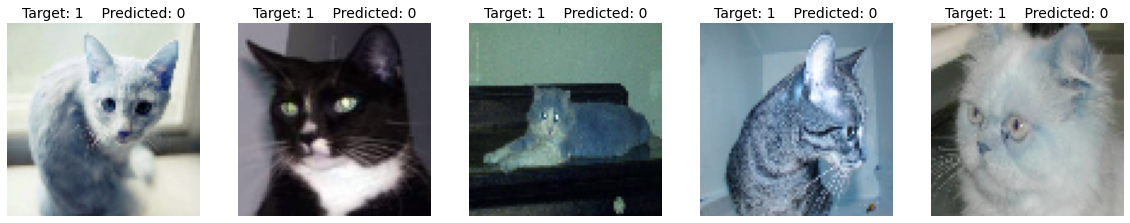

In [ ]:
# Display misclassified images

classes = ['0', '1']
X_test_t = X_test/255

predictions = np.argmax(model_part2_3.predict(X_test_t/255), axis=-1)

misclassifiedIndexes = []
index = 0

for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test_t[misclassifiedIndexes[index]], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

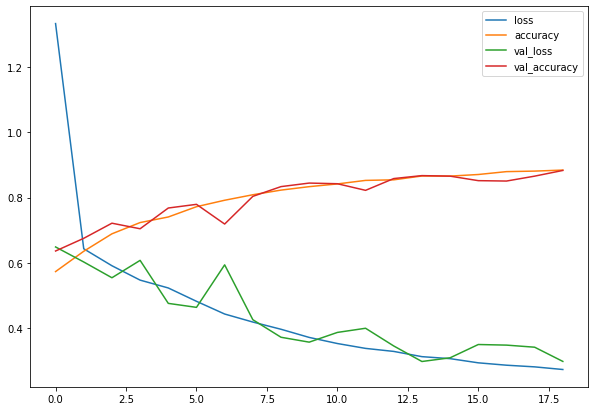

In [ ]:
pd.DataFrame(history_part2_3.history).plot(figsize=(10,7))

**Part 3**</br>
Use transfer learning. Train on at least three different expert CNNs: Xception, a variant of ResNet, and a variant of EfficientNet. See [here](https://keras.io/api/applications/) for a full list of models available in Keras. Please note that many of these have special requirements (for image size etc). You decide (or experiment with) how to best transfer learn on these expert CNNs.

What is the accuracy of your best model (on both validation and testing sets)? Plot several misclassified images. Save your accuracy and val_accuracy per epoch (from your best model). You will plot them in Part 4.



# Xception

In [ ]:
# Try Xception
# Data augmentation, global pooling and dropout
base_model = keras.applications.Xception(weights="imagenet",
                                              include_top=False,
                                         input_shape=(80,80,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg)
output = keras.layers.Dense(1, activation="sigmoid")(dropout)
model_Xception = keras.models.Model(inputs=base_model.input, outputs=output)

83689472/83683744 [==============================] - 2s 0us/step


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model_Xception.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-3),
                metrics=["accuracy"])

history_Xception_freeze = model_Xception.fit(datagen.flow(X_train_tr, y_train_tr, batch_size=32),
                    epochs=100,
                    validation_data=(X_train_v, y_train_v),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])
# converges to ~78% after 30 min

Epoch 1/100
469/469 [==============================] - 26s 50ms/step - loss: 2.1569 - accuracy: 0.5528 - val_loss: 1.1188 - val_accuracy: 0.6318
Epoch 2/100
469/469 [==============================] - 22s 48ms/step - loss: 1.5685 - accuracy: 0.5865 - val_loss: 1.2158 - val_accuracy: 0.6036
Epoch 3/100
469/469 [==============================] - 23s 49ms/step - loss: 1.4352 - accuracy: 0.5926 - val_loss: 1.2653 - val_accuracy: 0.5900
Epoch 4/100
469/469 [==============================] - 22s 48ms/step - loss: 1.2473 - accuracy: 0.6139 - val_loss: 0.8738 - val_accuracy: 0.6540
Epoch 5/100
469/469 [==============================] - 23s 48ms/step - loss: 1.2000 - accuracy: 0.6090 - val_loss: 0.7407 - val_accuracy: 0.6724
Epoch 6/100
469/469 [==============================] - 23s 48ms/step - loss: 1.1682 - accuracy: 0.6045 - val_loss: 0.7479 - val_accuracy: 0.6780
Epoch 7/100
469/469 [==============================] - 23s 49ms/step - loss: 1.0493 - accuracy: 0.6269 - val_loss: 0.7256 - val_ac

In [ ]:
model_Xception.evaluate(X_test, y_test)

157/157 [==============================] - 2s 15ms/step - loss: 0.6671 - accuracy: 0.6678


[0.6671401858329773, 0.6678000092506409]

My accuracy for the validation set and for the test set is 0.6678.

In [ ]:
# Unfreeze layers and train
%%time
for layer in base_model.layers:
    layer.trainable = True

model_Xception.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4), # need smaller lr
                metrics=["accuracy"])

n_epochs = 100
batch_size = 32

history_Xception_Unfreeze = model_Xception.fit(datagen.flow(X_train_tr, y_train_tr, batch_size=32),
                    epochs=100,
                    validation_data=(X_train_v, y_train_v),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])
# converges to ~94% after 45 min

Epoch 1/100
469/469 [==============================] - 49s 82ms/step - loss: 0.4741 - accuracy: 0.7647 - val_loss: 0.2155 - val_accuracy: 0.9132
Epoch 2/100
469/469 [==============================] - 38s 80ms/step - loss: 0.2052 - accuracy: 0.9142 - val_loss: 0.1894 - val_accuracy: 0.9222
Epoch 3/100
469/469 [==============================] - 38s 80ms/step - loss: 0.1471 - accuracy: 0.9456 - val_loss: 0.1740 - val_accuracy: 0.9322
Epoch 4/100
469/469 [==============================] - 38s 80ms/step - loss: 0.1069 - accuracy: 0.9591 - val_loss: 0.1702 - val_accuracy: 0.9380
Epoch 5/100
469/469 [==============================] - 38s 80ms/step - loss: 0.0880 - accuracy: 0.9672 - val_loss: 0.2170 - val_accuracy: 0.9380
Epoch 6/100
469/469 [==============================] - 38s 80ms/step - loss: 0.0649 - accuracy: 0.9752 - val_loss: 0.1941 - val_accuracy: 0.9418
Epoch 7/100
469/469 [==============================] - 38s 80ms/step - loss: 0.0543 - accuracy: 0.9802 - val_loss: 0.1649 - val_ac

In [ ]:
model_Xception.evaluate(X_test, y_test)

157/157 [==============================] - 2s 15ms/step - loss: 0.2272 - accuracy: 0.9416


[0.22723037004470825, 0.9416000247001648]

My accuracy for the validation set and for the test set is 0.9416.

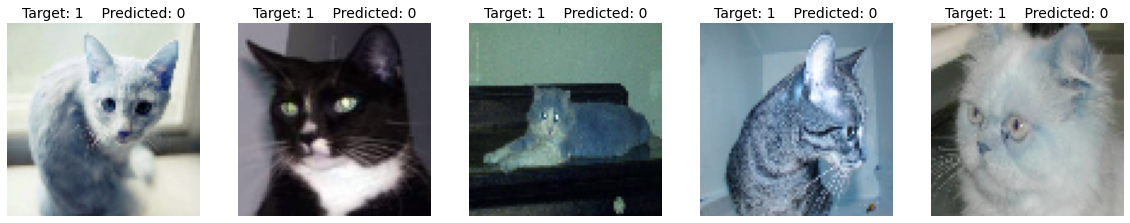

In [ ]:
# Display misclassified images

classes = ['0', '1']
X_test_t = X_test/255

predictions = np.argmax(model_Xception.predict(X_test_t/255), axis=-1)

misclassifiedIndexes = []
index = 0

for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test_t[misclassifiedIndexes[index]], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

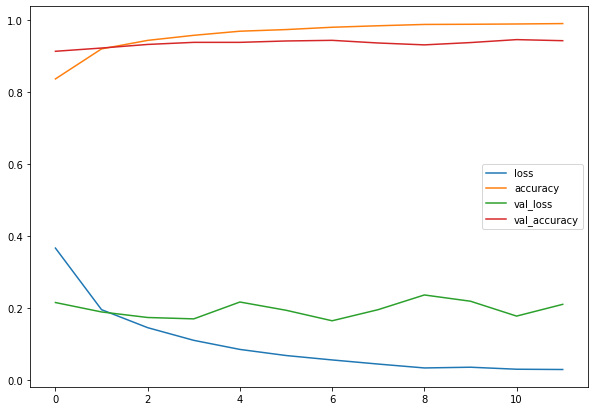

In [ ]:
pd.DataFrame(history_Xception_Unfreeze.history).plot(figsize=(10,7))

# ResNet50

In [ ]:
# Transfer learn from ResNet50
base_model = keras.applications.ResNet50(weights="imagenet",
                                         include_top=False,
                                         input_shape=(80,80,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg)
output = keras.layers.Dense(1, activation="sigmoid")(dropout)
model_ResNet = keras.models.Model(inputs=base_model.input, outputs=output)

94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
  layer.trainable = False

model_ResNet.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Nadam(1e-3),
              metrics=["accuracy"])

history_ResNet_freeze = model_ResNet.fit(X_train_tr, y_train_tr, batch_size=32,
                    epochs=50, validation_data=(X_train_v, y_train_v),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])
# converges to ~85% in about 3 min

Epoch 1/50
469/469 [==============================] - 14s 23ms/step - loss: 0.4249 - accuracy: 0.8111 - val_loss: 0.2801 - val_accuracy: 0.8748
Epoch 2/50
469/469 [==============================] - 10s 20ms/step - loss: 0.2716 - accuracy: 0.8864 - val_loss: 0.2693 - val_accuracy: 0.8848
Epoch 3/50
469/469 [==============================] - 9s 20ms/step - loss: 0.2489 - accuracy: 0.8970 - val_loss: 0.2552 - val_accuracy: 0.8898
Epoch 4/50
469/469 [==============================] - 9s 20ms/step - loss: 0.2355 - accuracy: 0.9022 - val_loss: 0.2694 - val_accuracy: 0.8920
Epoch 5/50
469/469 [==============================] - 9s 20ms/step - loss: 0.2284 - accuracy: 0.8981 - val_loss: 0.2792 - val_accuracy: 0.8866
Epoch 6/50
469/469 [==============================] - 9s 20ms/step - loss: 0.2155 - accuracy: 0.9102 - val_loss: 0.2661 - val_accuracy: 0.8902
Epoch 7/50
469/469 [==============================] - 9s 20ms/step - loss: 0.2084 - accuracy: 0.9152 - val_loss: 0.3029 - val_accuracy: 0.88

In [ ]:
model_ResNet.evaluate(X_test, y_test)

157/157 [==============================] - 2s 15ms/step - loss: 0.2623 - accuracy: 0.8888


[0.26228928565979004, 0.8888000249862671]

My accuracy for the validation set and for the test set is 0.8888.

In [ ]:
# Unfreeze transferred layers and train
%%time
for layer in base_model.layers:
  layer.trainable = True

model_ResNet.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Nadam(1e-4), # need smaller lr
              metrics=["accuracy"])
# re-compiling does not change weights

history_ResNet_Unfreeze = model_ResNet.fit(X_train_tr, y_train_tr, batch_size=32,
                    epochs=100, validation_data=(X_train_v, y_train_v),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])
# converges to ~93% in about 32 min

Epoch 1/100
469/469 [==============================] - 48s 72ms/step - loss: 0.3262 - accuracy: 0.8643 - val_loss: 0.1769 - val_accuracy: 0.9290
Epoch 2/100
469/469 [==============================] - 33s 70ms/step - loss: 0.0590 - accuracy: 0.9791 - val_loss: 0.1933 - val_accuracy: 0.9292
Epoch 3/100
469/469 [==============================] - 33s 70ms/step - loss: 0.0281 - accuracy: 0.9914 - val_loss: 0.3763 - val_accuracy: 0.9016
Epoch 4/100
469/469 [==============================] - 33s 70ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.2392 - val_accuracy: 0.9298
Epoch 5/100
469/469 [==============================] - 33s 70ms/step - loss: 0.0230 - accuracy: 0.9922 - val_loss: 0.2348 - val_accuracy: 0.9336
Epoch 6/100
469/469 [==============================] - 33s 70ms/step - loss: 0.0237 - accuracy: 0.9909 - val_loss: 0.2282 - val_accuracy: 0.9326
CPU times: user 2min 53s, sys: 32.5 s, total: 3min 26s
Wall time: 3min 32s


In [ ]:
model_ResNet.evaluate(X_test, y_test)

157/157 [==============================] - 2s 15ms/step - loss: 0.2575 - accuracy: 0.9344


[0.2574842870235443, 0.9344000220298767]

My accuracy for the validation set and for the test set is 0.9344.

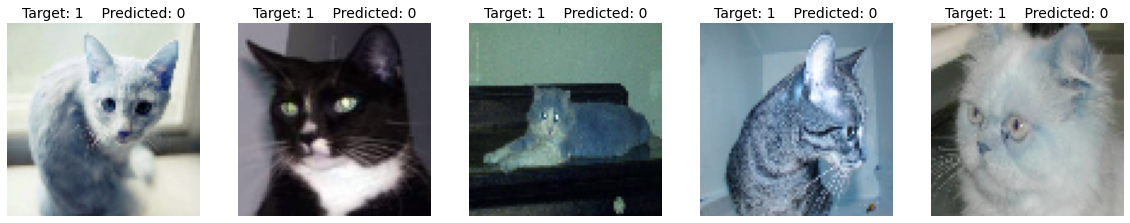

In [ ]:
# Display misclassified images

classes = ['0', '1']
X_test_t = X_test/255

predictions = np.argmax(model_ResNet.predict(X_test_t/255), axis=-1)

misclassifiedIndexes = []
index = 0

for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test_t[misclassifiedIndexes[index]], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

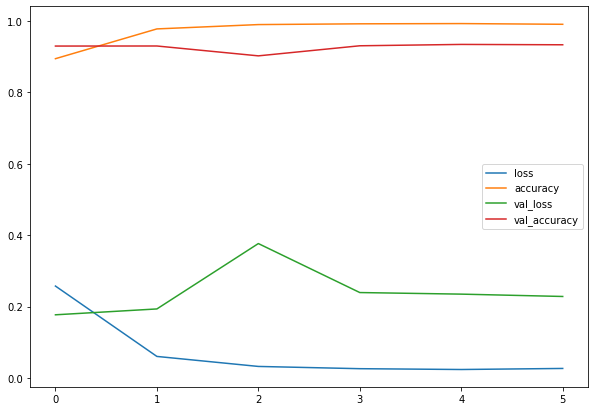

In [ ]:
pd.DataFrame(history_ResNet_Unfreeze.history).plot(figsize=(10,7))

# EfficientNet

In [ ]:
# Add data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

In [ ]:
# Add data augmentation
# Try a different top (with global pooling and dropout)
# Build EfficientNetB7 transfer learning model with Functional API
base_model = keras.applications.EfficientNetB0(weights="imagenet",
                                              include_top=False,
                                             input_shape=(80,80,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg)
output = keras.layers.Dense(1, activation="sigmoid")(dropout)
model_EfficientNet = keras.models.Model(inputs=base_model.input, outputs=output)

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model_EfficientNet.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-3),
                metrics=["accuracy"])
datagen.fit(X_train_tr)

history_EfficientNet_freeze = model_EfficientNet.fit(datagen.flow(X_train_tr, y_train_tr, batch_size=32),
                    epochs=100,
                    validation_data=(X_train_v, y_train_v),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])
# converges to ~90% after 30 min

Epoch 1/100
469/469 [==============================] - 29s 51ms/step - loss: 0.4479 - accuracy: 0.7803 - val_loss: 0.2641 - val_accuracy: 0.8860
Epoch 2/100
469/469 [==============================] - 23s 48ms/step - loss: 0.3154 - accuracy: 0.8562 - val_loss: 0.2508 - val_accuracy: 0.8932
Epoch 3/100
469/469 [==============================] - 22s 48ms/step - loss: 0.2950 - accuracy: 0.8701 - val_loss: 0.2473 - val_accuracy: 0.8960
Epoch 4/100
469/469 [==============================] - 22s 47ms/step - loss: 0.2962 - accuracy: 0.8693 - val_loss: 0.2416 - val_accuracy: 0.8986
Epoch 5/100
469/469 [==============================] - 23s 48ms/step - loss: 0.2821 - accuracy: 0.8735 - val_loss: 0.2414 - val_accuracy: 0.8954
Epoch 6/100
469/469 [==============================] - 22s 47ms/step - loss: 0.2793 - accuracy: 0.8792 - val_loss: 0.2395 - val_accuracy: 0.8960
Epoch 7/100
469/469 [==============================] - 22s 47ms/step - loss: 0.2834 - accuracy: 0.8735 - val_loss: 0.2401 - val_ac

In [ ]:
model_EfficientNet.evaluate(X_test, y_test)

157/157 [==============================] - 2s 11ms/step - loss: 0.2280 - accuracy: 0.8982


[0.22796174883842468, 0.8981999754905701]

My accuracy for the validation set and for the test set is 0.8982.

In [ ]:
# Unfreeze layers and train
%%time
for layer in base_model.layers:
    layer.trainable = True

model_EfficientNet.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4), # need smaller lr
                metrics=["accuracy"])

datagen.fit(X_train_tr)

n_epochs = 100
batch_size = 32
history_EfficientNet_Unfreeze = model_EfficientNet.fit(datagen.flow(X_train_tr, y_train_tr, batch_size=32),
                    epochs=100,
                    validation_data=(X_train_v, y_train_v),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])
# Converges to ~92.5% after 1 hour

Epoch 1/100
469/469 [==============================] - 51s 76ms/step - loss: 0.4644 - accuracy: 0.7968 - val_loss: 0.2588 - val_accuracy: 0.8966
Epoch 2/100
469/469 [==============================] - 34s 72ms/step - loss: 0.2502 - accuracy: 0.8947 - val_loss: 0.2187 - val_accuracy: 0.9114
Epoch 3/100
469/469 [==============================] - 34s 72ms/step - loss: 0.1878 - accuracy: 0.9261 - val_loss: 0.2011 - val_accuracy: 0.9216
Epoch 4/100
469/469 [==============================] - 34s 72ms/step - loss: 0.1482 - accuracy: 0.9399 - val_loss: 0.1816 - val_accuracy: 0.9296
Epoch 5/100
469/469 [==============================] - 34s 72ms/step - loss: 0.1281 - accuracy: 0.9511 - val_loss: 0.1735 - val_accuracy: 0.9302
Epoch 6/100
469/469 [==============================] - 34s 72ms/step - loss: 0.1096 - accuracy: 0.9555 - val_loss: 0.1674 - val_accuracy: 0.9330
Epoch 7/100
469/469 [==============================] - 34s 72ms/step - loss: 0.0963 - accuracy: 0.9611 - val_loss: 0.1645 - val_ac

In [ ]:
model_EfficientNet.evaluate(X_test, y_test)

157/157 [==============================] - 2s 12ms/step - loss: 0.1941 - accuracy: 0.9430


[0.19414596259593964, 0.9430000185966492]

My accuracy for the validation set and for the test set is 0.9430.

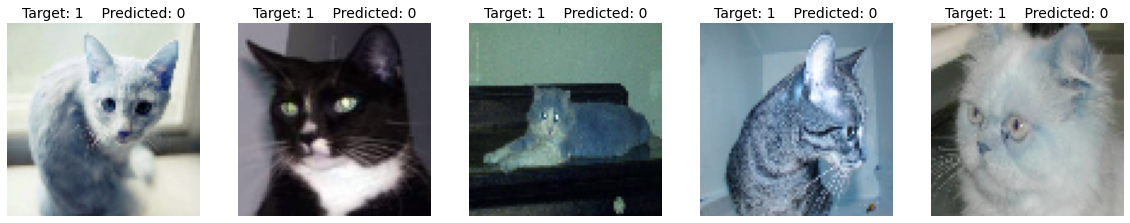

In [ ]:
# Display misclassified images

classes = ['0', '1']
X_test_t = X_test/255

predictions = np.argmax(model_EfficientNet.predict(X_test_t/255), axis=-1)

misclassifiedIndexes = []
index = 0

for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test_t[misclassifiedIndexes[index]], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

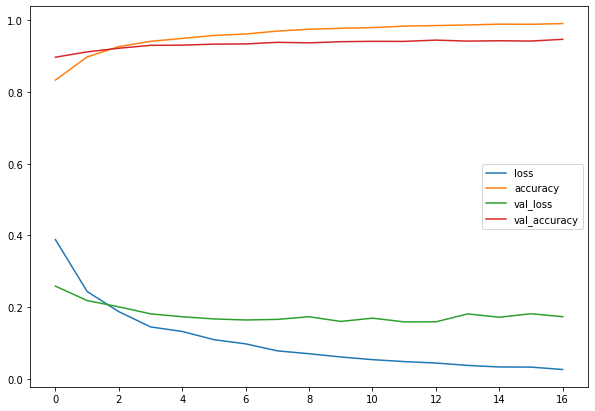

In [ ]:
pd.DataFrame(history_EfficientNet_Unfreeze.history).plot(figsize=(10,7))

**Part 4**</br>
Plot the training and validation accuracy per epoch for your (best) model from each part. Discuss any differences. Which model(s) tend to be overfit? Which model(s) are not? Why?

Note: If you have a model B that is only a little better than a model A with respect to validation/testing accuracy, but model B is not overfit and model A is, that is actually a huge improvement.

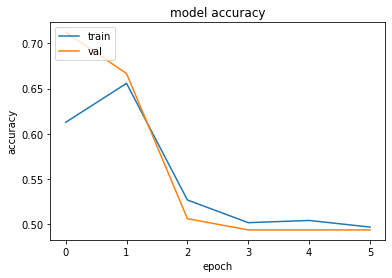

In [ ]:
# model_part_1
import keras
from matplotlib import pyplot as plt

plt.plot(history_part_1.history['accuracy'])
plt.plot(history_part_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In the part 1 model, I think it is not overfit. The plots of training and validation accuracy are similar and close.

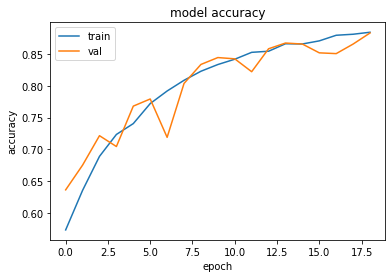

In [ ]:
# model_part_3: The best model in part 2
import keras
from matplotlib import pyplot as plt

plt.plot(history_part2_3.history['accuracy'])
plt.plot(history_part2_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In the third model of part 2, I think it is not overfit. The plots of training and validation accuracy are similar and close. This model is less overfit than the part 1 model. Because their lines are basically the same.

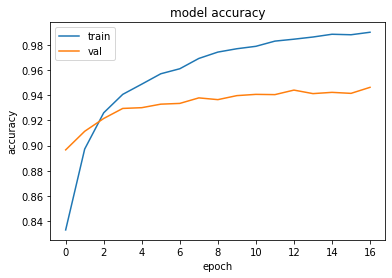

In [ ]:
# model_EfficientNet: The best model in part 3: EfficientNet
import keras
from matplotlib import pyplot as plt

plt.plot(history_EfficientNet_Unfreeze.history['accuracy'])
plt.plot(history_EfficientNet_Unfreeze.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In the EfficientNet model of part 3, I think it is a little overfit. There are some gaps in training and validation accuracy. The difference between them is about 4%. Although this is not very overfit, it is a bit more overfit than other models.

**GRADUATE STUDENTS ONLY**</br>
Again, test your best model on the Kaggle testing set and submit. Show a screenshot etc as proof.